# Tutorial

This tutorial presents a scenario of how expression and network data can be combined to tell a biological story and includes these concepts:

- Visualizing networks using expression data.
- Filtering networks based on expression data.
- Assessing expression data in the context of a biological network.

## Setting up py4cytoscape

In [12]:
!pip install git+https://github.com/bdemchak/py4cytoscape

  Cloning https://github.com/bdemchak/py4cytoscape to /tmp/pip-req-build-dpdujo5q
  Running command git clone -q https://github.com/bdemchak/py4cytoscape /tmp/pip-req-build-dpdujo5q
  Created wheel for py4cytoscape: filename=py4cytoscape-0.0.1-cp36-none-any.whl size=117821 sha256=95721bb0691a4bf4c262aee69eef58286a44bdf8de85a359ba1a223adeed0c7d
  Stored in directory: /tmp/pip-ephem-wheel-cache-pu3aol31/wheels/d6/cf/5e/9b4bb1382158e8c62095ddbfd669d0f9a4e53777793a62aee7
Successfully built py4cytoscape


### Checking the connection between this notebook and the Cytoscape REST service
After installing and launching Cytoscape, run the following cells.

In [ ]:
!curl localhost:1234

In [13]:
import pandas as pd
import py4cytoscape as p4c
p4c.cytoscape_ping()

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/version)
[INFO] py4...S:  ǀǀOK[200]


You are connected to Cytoscape!


In [14]:
p4c.cytoscape_version_info()

[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/version)
[INFO] py4...S:  ǀOK[200]


{'apiVersion': 'v1', 'cytoscapeVersion': '3.8.0'}

## Loading Network
You can download the [demo network session file](https://nrnb.org/data/BasicDataVizDemo.cys) to your current working directory by running…

In [15]:
!wget https://nrnb.org/data/BasicDataVizDemo.cys

--2020-06-21 10:08:49--  https://nrnb.org/data/BasicDataVizDemo.cys
Resolving nrnb.org (nrnb.org)... 185.199.108.153
Connecting to nrnb.org (nrnb.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1390524 (1.3M) [application/octet-stream]
Saving to: ‘BasicDataVizDemo.cys’

BasicDataVizDemo.cy 100%[===================>]   1.33M  8.53MB/s    in 0.2s    

2020-06-21 10:08:50 (8.53 MB/s) - ‘BasicDataVizDemo.cys’ saved [1390524/1390524]



Now open the demo network using…

In [16]:
p4c.open_session(file_location="./BasicDataVizDemo.cys")

Opening /content/BasicDataVizDemo.cys...[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/session/open), data: b'{"file": "/content/BasicDataVizDemo.cys"}'
[INFO] py4...S:  ǀOK[200]


{}

Now you should see a network like this.

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/BasicDataVizDemo.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]


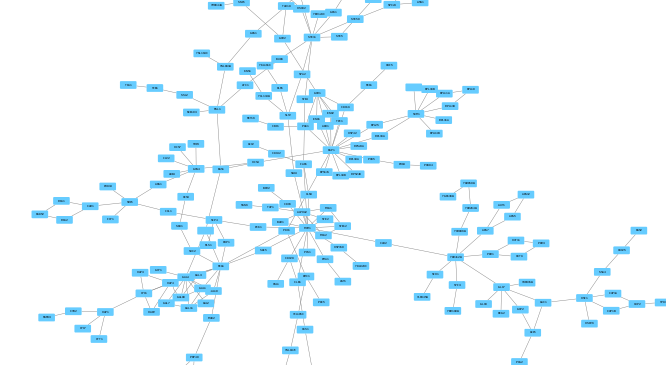

In [17]:
p4c.export_image(filename="BasicDataVizDemo.png")
from IPython.display import Image
Image('BasicDataVizDemo.png')

## Visualizing Expression Data on Networks

Probably the most common use of expression data in Cytoscape is to set the **visual properties** of the nodes (color, shape, border) in a network according to expression data. This creates a powerful visualization, portraying functional relation and experimental response at the same time. Here, we will show an example of doing this.

The data used in this example is from yeast, and represents an experiment of perturbations of the genes **Gal1**, **Gal4**, and **Gal80**, which are all yeast transcription factors.

For this tutorial, the experimental data was part of the Cytoscape session file you loaded earlier, and is visible in the Node Table:

![Galbrowse3](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/Galbrowse3.png)

- You can select nodes in the network by


In [18]:
p4c.select_nodes(['YDL194W', 'YLR345W'], by_col='name')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/select), data: b'{"network": "SUID:51", "nodeList": "name:YDL194W,name:YLR345W"}'
[INFO] py4...S:  ǀOK[200]


{'edges': [], 'nodes': [66, 61]}

- Selecting one or more nodes in the network will update the Node Table to show only the corresponding row(s).

![SelectNodes](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/SelectNodes.PNG)

We can now use the data to manipulate the visual properties of the network by mapping specific data columns to visual style properties:

- The **gal80Rexp** expression values will be mapped to node color; nodes with low expression will be colored blue, nodes with high expression will be colored red.
- Significance for expression values will be mapped to Node Border Width, so nodes with significant changes will appear with a thicker border.

### Set Node Fill Color

- Click on the **Style** tab in the Control Panel. And you can set node fill color by


In [19]:
gal80Rexp_score_table = p4c.get_table_columns(table='node', columns='gal80Rexp')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns/gal80Rexp)
[INFO] py4...S:  ǀOK[200]


In [20]:
gal80Rexp_score_table.head()

,gal80Rexp
61,0.449
62,0.448
63,-0.232
64,0.247
65,0.94


In [21]:
gal80Rexp_min = gal80Rexp_score_table.min().values[0]
gal80Rexp_max = gal80Rexp_score_table.max().values[0]
gal80Rexp_center = gal80Rexp_min + (gal80Rexp_max - gal80Rexp_min)/2

In [22]:
p4c.set_node_color_mapping('gal80Rexp', [gal80Rexp_min, gal80Rexp_center, gal80Rexp_max], ['#0000FF', '#FFFFFF', '#FF0000'])

[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/styles/default/defaults)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/styles/default/mappings)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/styles/default/mappings), json: [{'mappingType': 'continuous', 'mappingColumn': 'gal80Rexp', 'mappingC

''

- This produces an initial gradient ranging from blue to red for expression values. Notice that the nodes in the network change color. ![SetNodeFillColor](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/SetNodeFillColor.jpg)

### Set Default Node Color
Some nodes in the network don’t have any data, and for those nodes, the default color applies. In our case, the default color is blue, which falls within the spectrum of our blue-red gradient. This is not ideal for data visualization, so a useful trick is to choose a color outside the gradient spectrum to distinguish nodes with no defined expression value.

- Still in the **Style** tab, And you can set default node color to dark gray by

In [23]:
p4c.set_node_color_default('#666666')

[INFO] py4...S:  ǀǀHTTP PUT(http://localhost:1234/v1/styles/default/defaults), json: [{'visualProperty': 'NODE_FILL_COLOR', 'value': '#666666'}]
[INFO] py4...S:  ǀǀOK[200]


''

![SetDefaultNodeColor](https://github.com/nrnb/gsod2019_kozo_nishida/blob/master/images/SetDefaultNodeColor.PNG?raw=true)


### Set Node Border Width
You can set the `Border Width` by


In [24]:
gal80Rsig_score_table = p4c.get_table_columns(table='node', columns='gal80Rsig')
gal80Rsig_min = gal80Rsig_score_table.min().values[0]
gal80Rsig_max = gal80Rsig_score_table.max().values[0]
p4c.set_node_border_width_mapping('gal80Rsig', table_column_values=[gal80Rsig_min, gal80Rsig_max], widths=[10, 30])

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns/gal80Rsig)
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhos

''

This defines the node border width over the range of `gal80Rsig` column p-values like

![SetNodeBorderWidth1](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/SetNodeBorderWidth1.jpg)

Double-clicking on the diagonal graph to the right of `Current Mapping` will bring up a window similar to the one below.

![SetNodeBorderWidth2](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/SetNodeBorderWidth2.jpg)


## Layouts

An important aspect of network visualization is the layout, meaning the positioning of nodes and edges. Our network had a preset layout in the original file you imported, but this can be changed.

- Let’s change the layout to **Degree Sorted Circle Layout** by

In [25]:
p4c.layout_network('degree-circle')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/layout/degree-circle), data: b'{"network": "SUID:51"}'
[INFO] py4...S:  ǀOK[200]


{}

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/degree-circle.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]


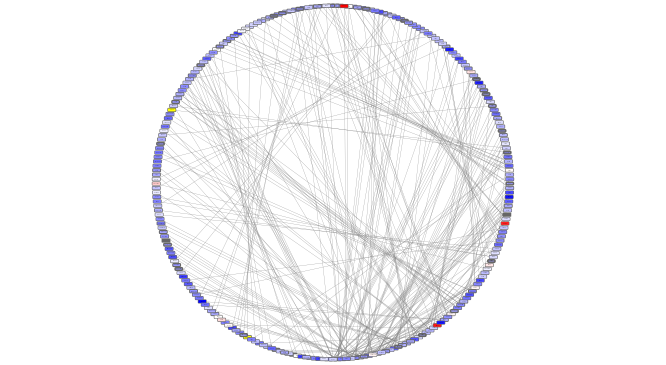

In [26]:
p4c.export_image(filename='degree-circle.png')
Image('degree-circle.png')

In this layout, nodes are sorted by degree (connectedness), with the highest degree node at the 6 o’clock position, and remaining nodes are sorted counter clock-wise based on decreasing degree.

For this network, a degree-sorted circle layout may not be the most effective. Instead, let’s try a force-directed layout instead, which may work better with this network.

In [27]:
p4c.layout_network('force-directed')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/layout/force-directed), data: b'{"network": "SUID:51"}'
[INFO] py4...S:  ǀOK[200]


{}

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/force-directed.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]


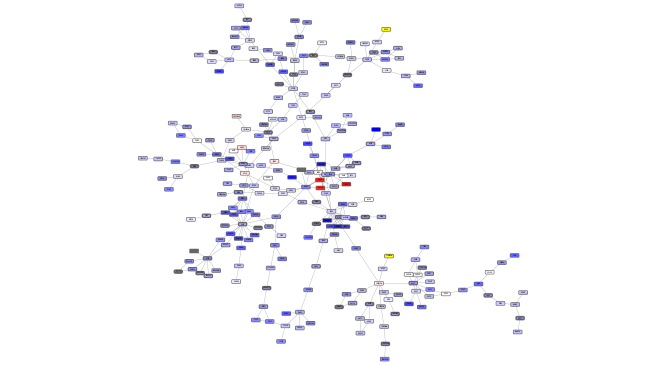

In [28]:
p4c.export_image(filename='force-directed.png')
Image('force-directed.png')

Cytoscape supports many different layout algorithms, described in detail in the [Cytoscape manual](http://manual.cytoscape.org/en/stable/Navigation_and_Layout.html?highlight=layout#automatic-layout-algorithms).

## Select Nodes

Cytoscape allows you to easily filter and select nodes and edges based on data attributes. Next, we will select a subset of nodes with high expression in the gal80 knockout:

- Let’s create column filter for **Node: gal80Rexp** by

In [29]:
p4c.create_column_filter('myFilter', 'gal80Rexp', 2.00, "GREATER_THAN")

[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/set%20current), data: b'{"network": "SUID:51"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/51/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", 

No edges selected.


{'edges': None, 'nodes': ['YBR018C', 'YBR020W', 'YBR019C']}

You should now see only a few nodes in the network selected (highlighted yellow).

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/column-filter.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]


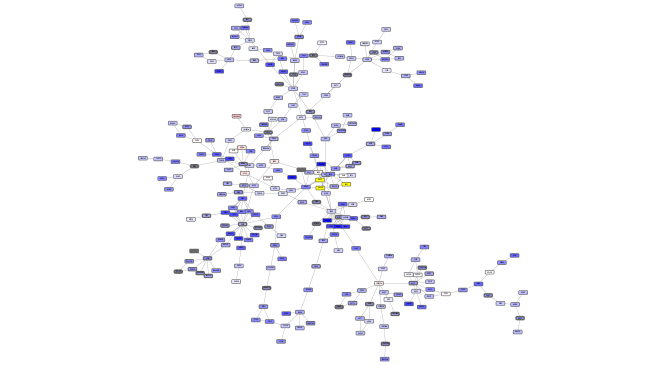

In [30]:
p4c.export_image(filename='column-filter.png')
Image('column-filter.png')

### Expand Selection and Create New Network
We have now selected only the few top expressing nodes. To see the context of these nodes in the larger network, we can expand the selection of nodes to include the nodes connecting to the selected nodes, i.e. the first neighbors. Once we have that larger selection, we can create a new network.

- Select the first neighbors of selected nodes by

In [31]:
p4c.select_first_neighbors()

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/select), data: b'{"firstNeighbors": "any", "network": "SUID:51"}'
[INFO] py4...S:  ǀOK[200]


{'edges': [], 'nodes': [239, 240, 137, 234, 235, 237, 238]}

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/first-neighbors.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]


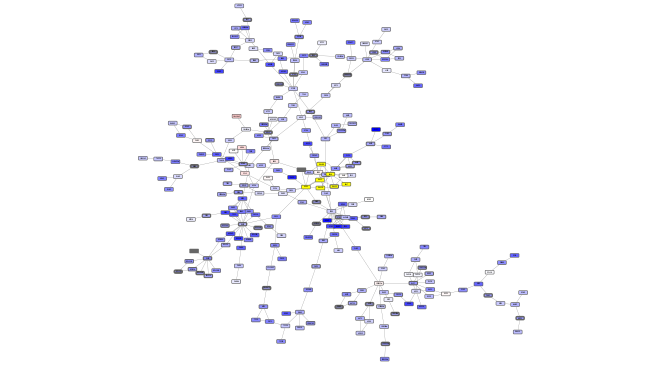

In [32]:
p4c.export_image(filename='first-neighbors.png')
Image('first-neighbors.png')

Digging into the biology of this network, it turns out that GAL4 is repressed by GAL80. Both nodes (GAL4 and GAL11) show fairly small changes in expression, and neither change is statistically significant: they are pale blue with thin borders. These slight changes in expression suggest that the critical change affecting the red nodes might be somewhere else in the network, and not either of these nodes. GAL4 interacts with GAL80, which shows a significant level of repression: it is medium blue with a thicker border.

Note that while GAL80 shows evidence of significant repression, most nodes interacting with GAL4 show significant levels of induction: they are rendered as red rectangles. GAL11 is a general transcription co-factor with many interactions.

Putting all of this together, we see that the ***transcriptional activation activity of Gal4 is repressed by Gal80***. So, repression of Gal80 increases the transcriptional activation activity of Gal4. Even though the expression of Gal4 itself did not change much, ***the Gal4 transcripts were much more likely to be active transcription factors when Gal80 was repressed.*** This explains why there is so much up-regulation in the vicinity of Gal4.

#### Summary
In summary, we have:

- Explored a yeast interactome from a transcription factor knockout experiment
- Created a visual style using expression value as node color and with border width mapped to significance
- Selected high expressing genes and their neighbors and created a new network

Finally, we can now export this network as a publication-quality image….

## Saving Results

Cytoscape provides a number of ways to save results and visualizations:

- As a session:

In [33]:
p4c.save_session('basic-data-visualization.cys')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/session/save%20as), data: b'{"file": "/content/basic-data-visualization.cys"}'
[INFO] py4...S:  ǀOK[200]


{}

- As an image:

In [34]:
p4c.export_image('basic-data-visualization', type='PDF')
p4c.export_image('basic-data-visualization', type='PNG')
p4c.export_image('basic-data-visualization', type='JPEG')
p4c.export_image('basic-data-visualization', type='SVG')
p4c.export_image('basic-data-visualization', type='PS')

[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/basic-data-visualization.pdf", "options": "PDF", "view": "SUID:626"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/51/views)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/view/export), data: b'{"OutputFile": "/content/basic-data-visualization.png", "options": "PNG", "view": "SUID:626"}'
[INFO] py4...S:  ǀ

{'file': '/content/basic-data-visualization.ps'}

- To a public repository:

```
p4c.export_network_to_ndex('userid', 'password', True)
```

- As a graph format file (Formats: “CX JSON”, “Cytoscape.js JSON”, “GraphML”, “XGMML”, “SIF”,…):

In [35]:
p4c.export_network('basic-data-visualization', 'CX')
p4c.export_network('basic-data-visualization', 'cyjs')
p4c.export_network('basic-data-visualization', 'graphML')
p4c.export_network('basic-data-visualization', 'xGMML')
p4c.export_network('basic-data-visualization', 'SIF')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/export), data: b'{"options": "CX", "OutputFile": "/content/basic-data-visualization.cx"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/export), data: b'{"options": "CYJS", "OutputFile": "/content/basic-data-visualization.cyjs"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/export), data: b'{"options": "GraphML", "OutputFile": "/content/basic-data-visualization.graphml"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/export), data: b'{"options": "XGMML", "OutputFile": "/content/basic-data-visualization.xgmml"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/network/export), data: b'{"options": "SIF", "OutputFile": "/content/basic-data-visualization.sif"}'
[INFO] py4...S:  ǀOK[200]


{'file': '/content/basic-data-visualization.sif'}